# Demo with NIR Data

- [Shootout NIR 2002 Data](https://eigenvector.com/resources/data-sets/#tablet-sec)
  - NIR data with API weight fractions

In [1]:
from glob import glob
if len(glob('*.mat')) == 0:
    """
    Shootout Near Infrared Data is downloaded 
    if the mat file doesn't exist.
    """
    !wget https://eigenvector.com/wp-content/uploads/2019/06/nir_shootout_2002.mat_.zip
    !unzip nir_shootout_2002.mat_.zip
    !ls *.mat

--2020-06-29 01:00:14--  https://eigenvector.com/wp-content/uploads/2019/06/nir_shootout_2002.mat_.zip
Resolving eigenvector.com (eigenvector.com)... 69.163.163.60
Connecting to eigenvector.com (eigenvector.com)|69.163.163.60|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5414232 (5.2M) [application/zip]
Saving to: ‘nir_shootout_2002.mat_.zip’

nir_shootout_2002.m 100%[===================>]   5.16M  3.83MB/s    in 1.3s    

2020-06-29 01:00:16 (3.83 MB/s) - ‘nir_shootout_2002.mat_.zip’ saved [5414232/5414232]

Archive:  nir_shootout_2002.mat_.zip
  inflating: nir_shootout_2002.mat   
   creating: __MACOSX/
  inflating: __MACOSX/._nir_shootout_2002.mat  
nir_shootout_2002.mat


In [2]:
from scipy.io import loadmat

In [3]:
data = loadmat('nir_shootout_2002.mat')
def load_shootout(keyname):
    return data[keyname][0][0][5]

X = load_shootout('calibrate_1')
print('NIR shape [n_samples x n_channels]', X.shape)

xaxis = data['calibrate_1'][0][0][7][-1][0]

NIR shape [n_samples x n_channels] (155, 650)


In [4]:
y = load_shootout('calibrate_Y')
y = y[:, -1] / y[:,0]# API weight fractions
print('y shape', y.shape)

y shape (155,)


## NMF for 2 Ways Spectra Data 

In [5]:
import sys
sys.path.append('..')

In [6]:
from malspy import NMF

Training NMF model....
1th iteration of NMF algorithm
# updates: 49
2th iteration of NMF algorithm
# updates: 49
3th iteration of NMF algorithm
# updates: 49


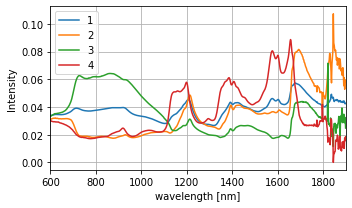

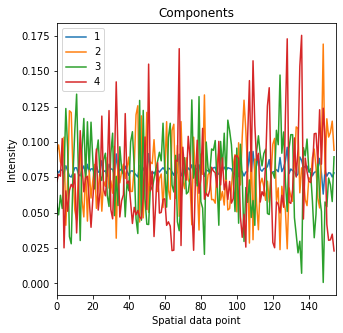

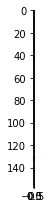

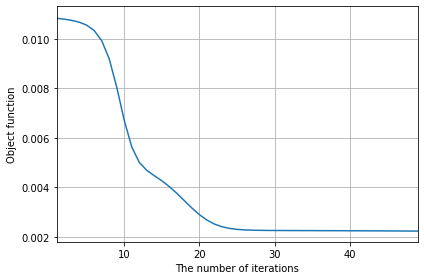

In [7]:
model_nmf = NMF(n_components=4, reps=3, max_itr=50)
model_nmf.fit(X, channel_vals=xaxis.reshape(-1,), unit_name='wavelength [nm]')
model_nmf.plot_spectra(figsize=(5,3), normalize=True)
model_nmf.imshow_component(figsize=(5,5), figshape=(1,2))
model_nmf.imshow_residual_image(figsize=(3,3))
model_nmf.plot_object_fun()